In [15]:
# computational import
import numpy as np
import xarray as xr

# plotting import
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [3]:
# open density datasets
list11 = np.linspace(1,11,11)
ds = {}
for i in list11:
    ds[int(i)] = xr.open_dataset('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'.nc')

In [4]:
ds[1]

<xarray.Dataset>
Dimensions:         (lon: 719, lat: 359)
Coordinates:
  * lon             (lon) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * lat             (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5
Data variables:
    den             (lon, lat) float64 ...
    den15           (lon, lat) float64 ...
    den_grounded    (lon, lat) float64 ...
    den15_grounded  (lon, lat) float64 ...

In [5]:
# import datelist for plotting
dlist = ['31-Jan-2014','02-Mar-2014','01-Apr-2014','01-May-2014','31-May-2014','30-Jun-2014',
    '30-Jul-2014','29-Aug-2014','28-Sep-2014','28-Oct-2014','27-Nov-2014']

In [6]:
# designate bins
lon = np.linspace(-180,180, 360*2)
lat = np.linspace(-90, 90, 180*2)

In [18]:
# Create a colormap
cmap = plt.get_cmap('Spectral_r')

# Modify the colormap to set 0 to white
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1, 1, 1, 1.0)  # Set the first color in the colormap to white
cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

In [57]:
x1, x2 = np.nanpercentile(ds[int(i)]['den_grounded'],[1,99])  
display(x1,x2)

0.0

1676.5999999999767

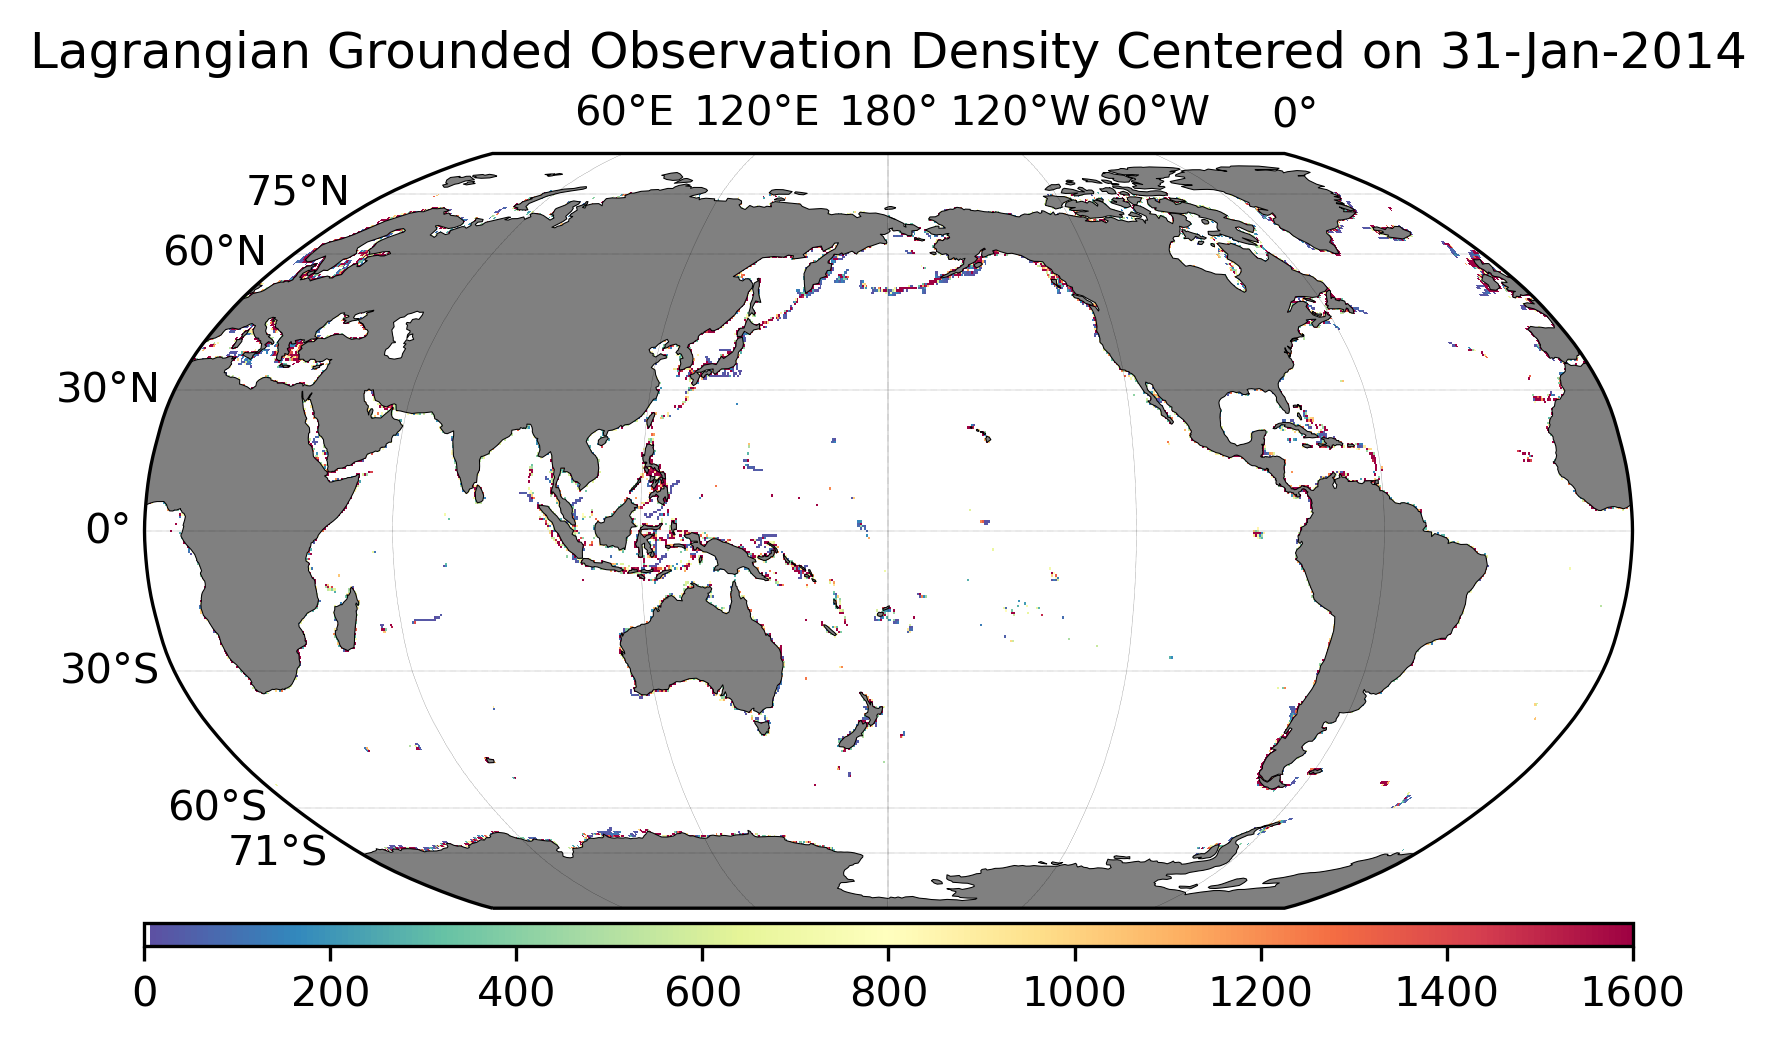

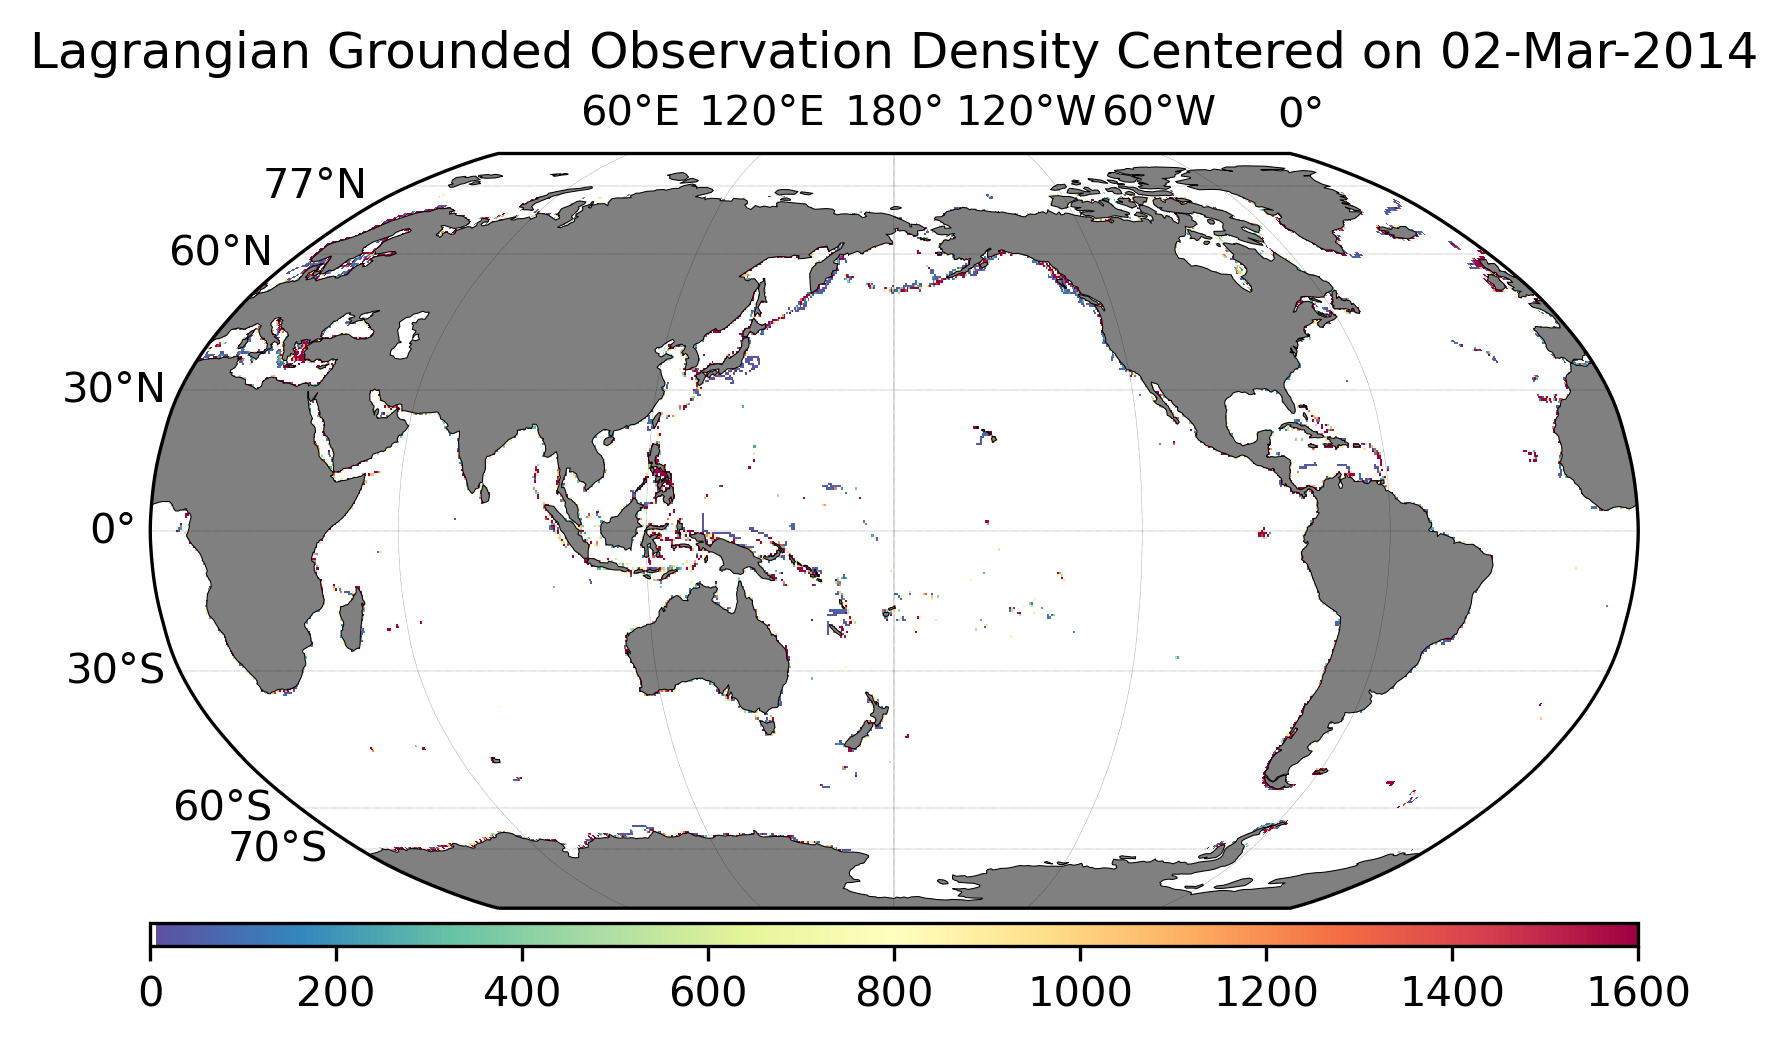

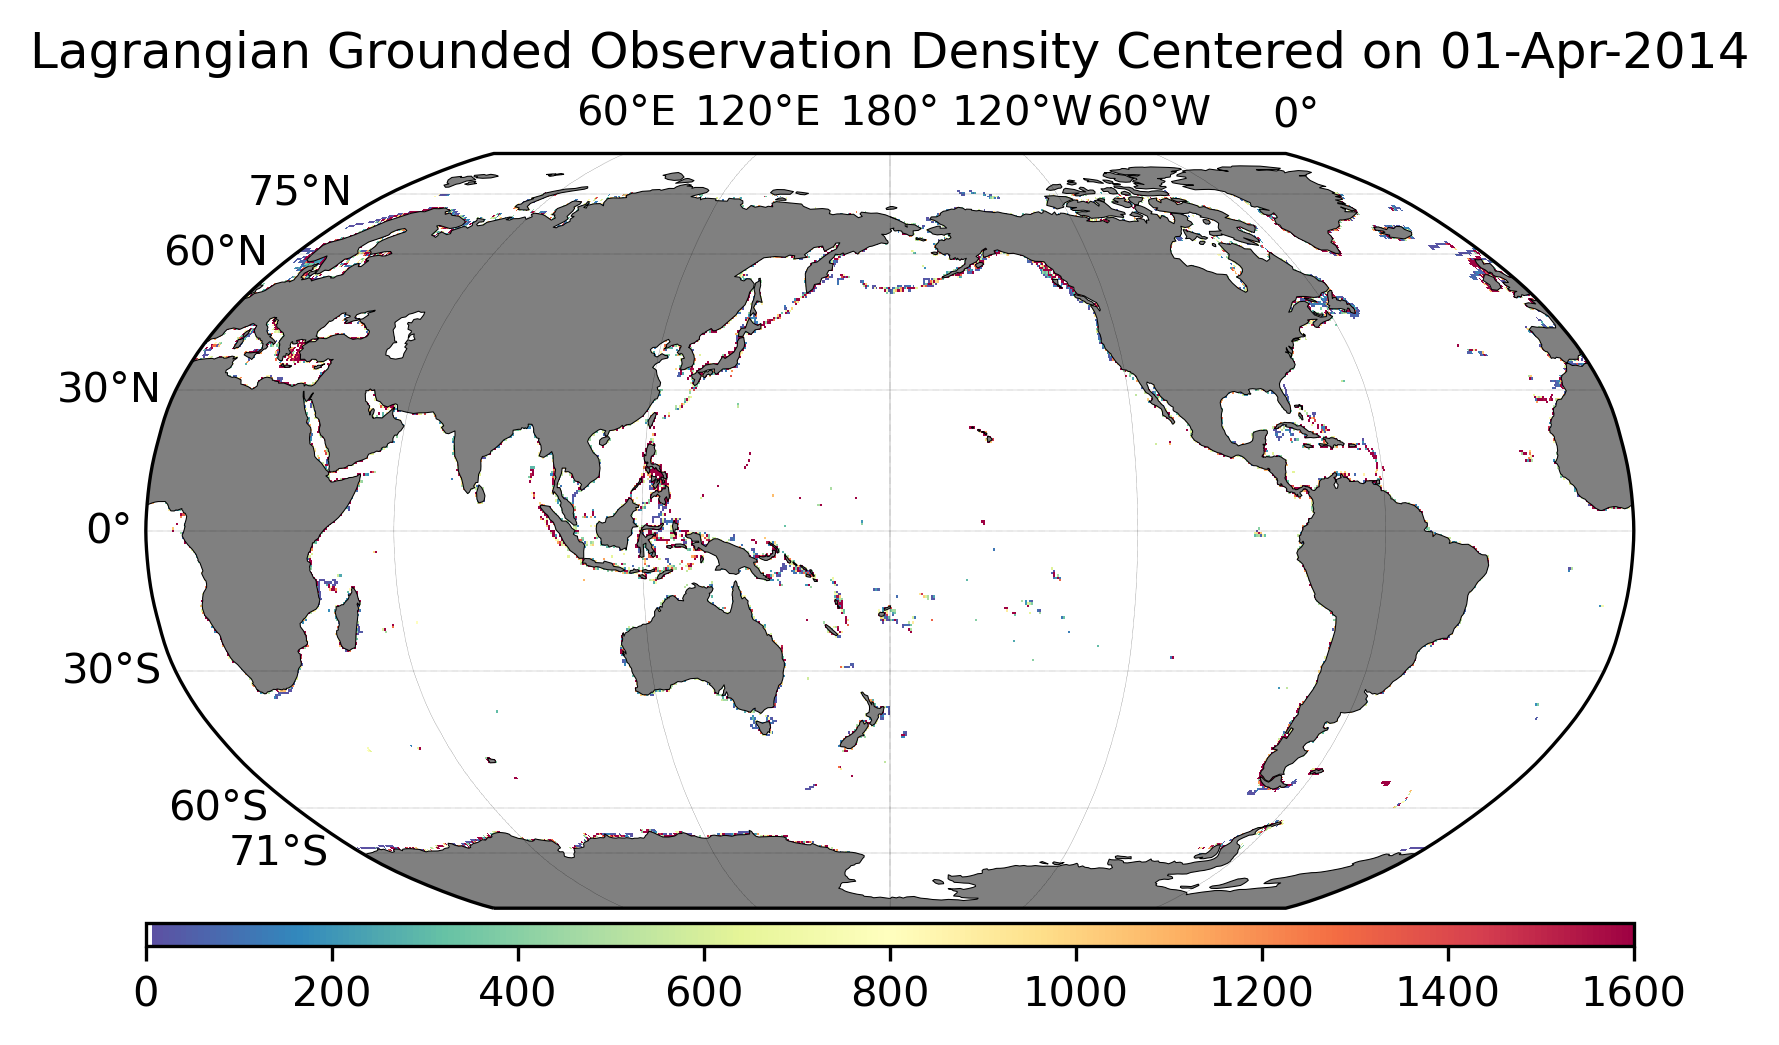

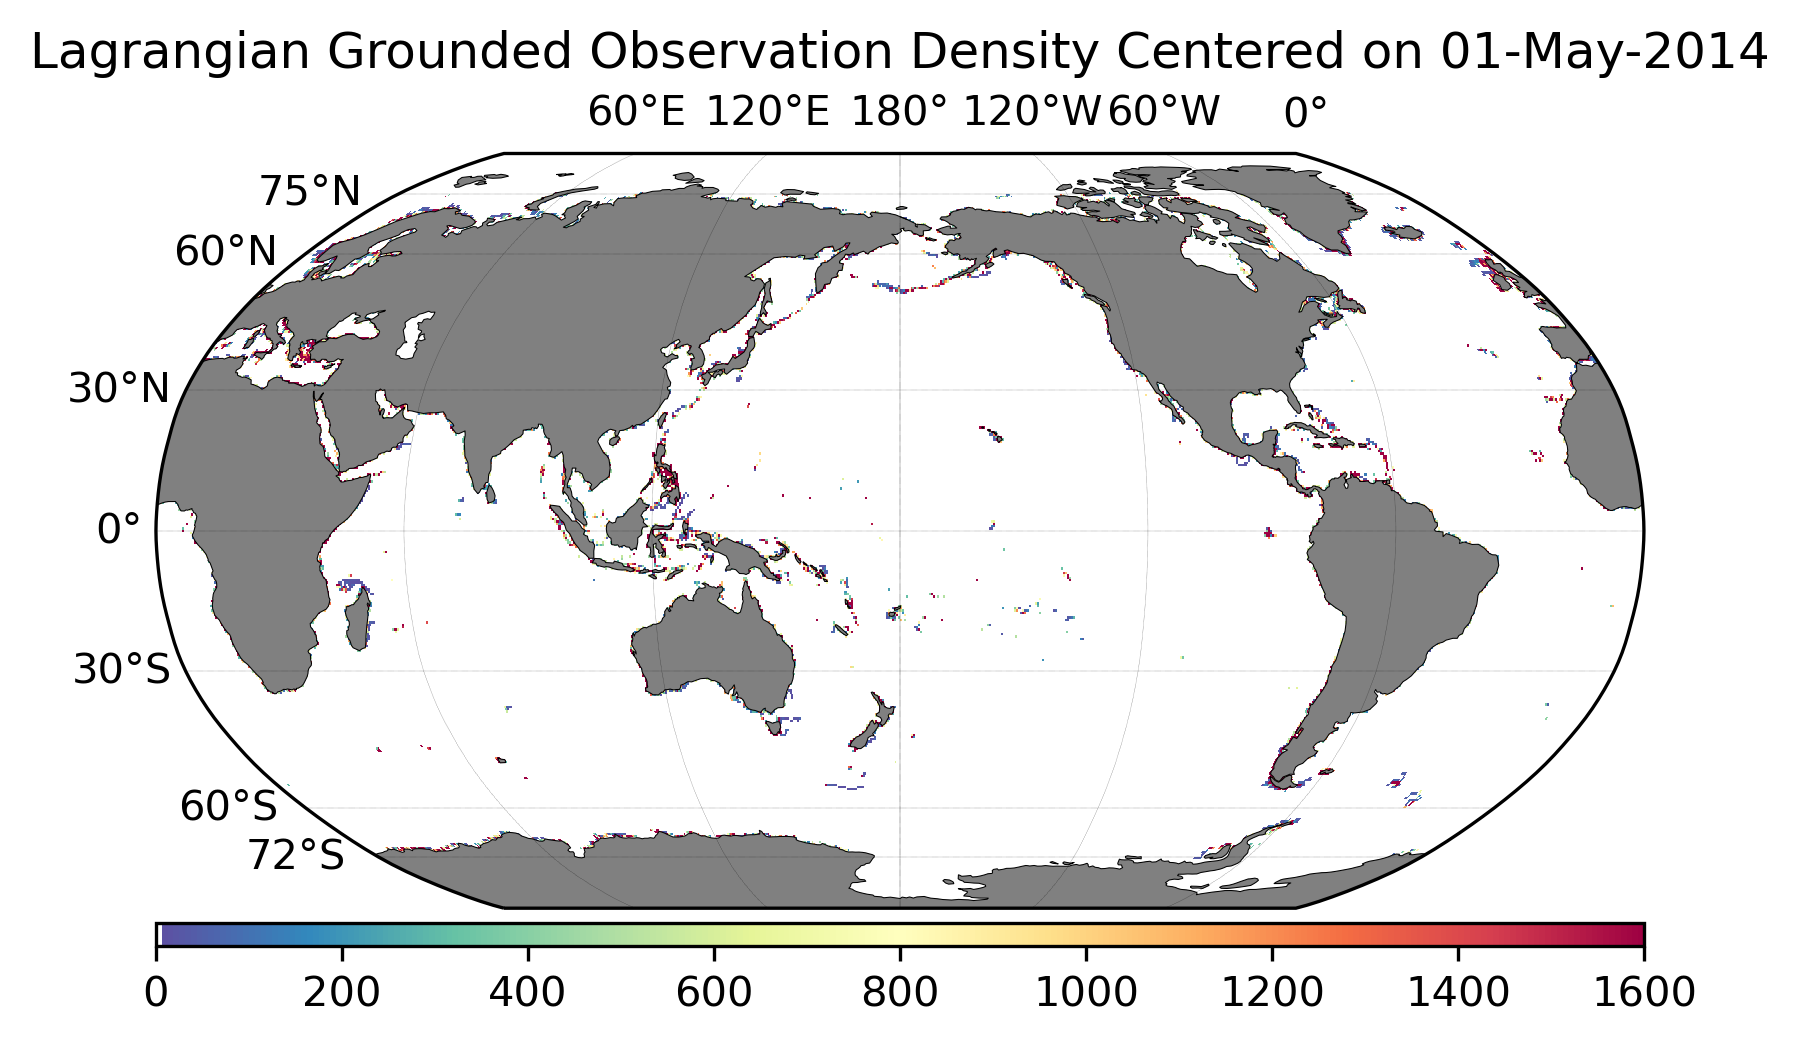

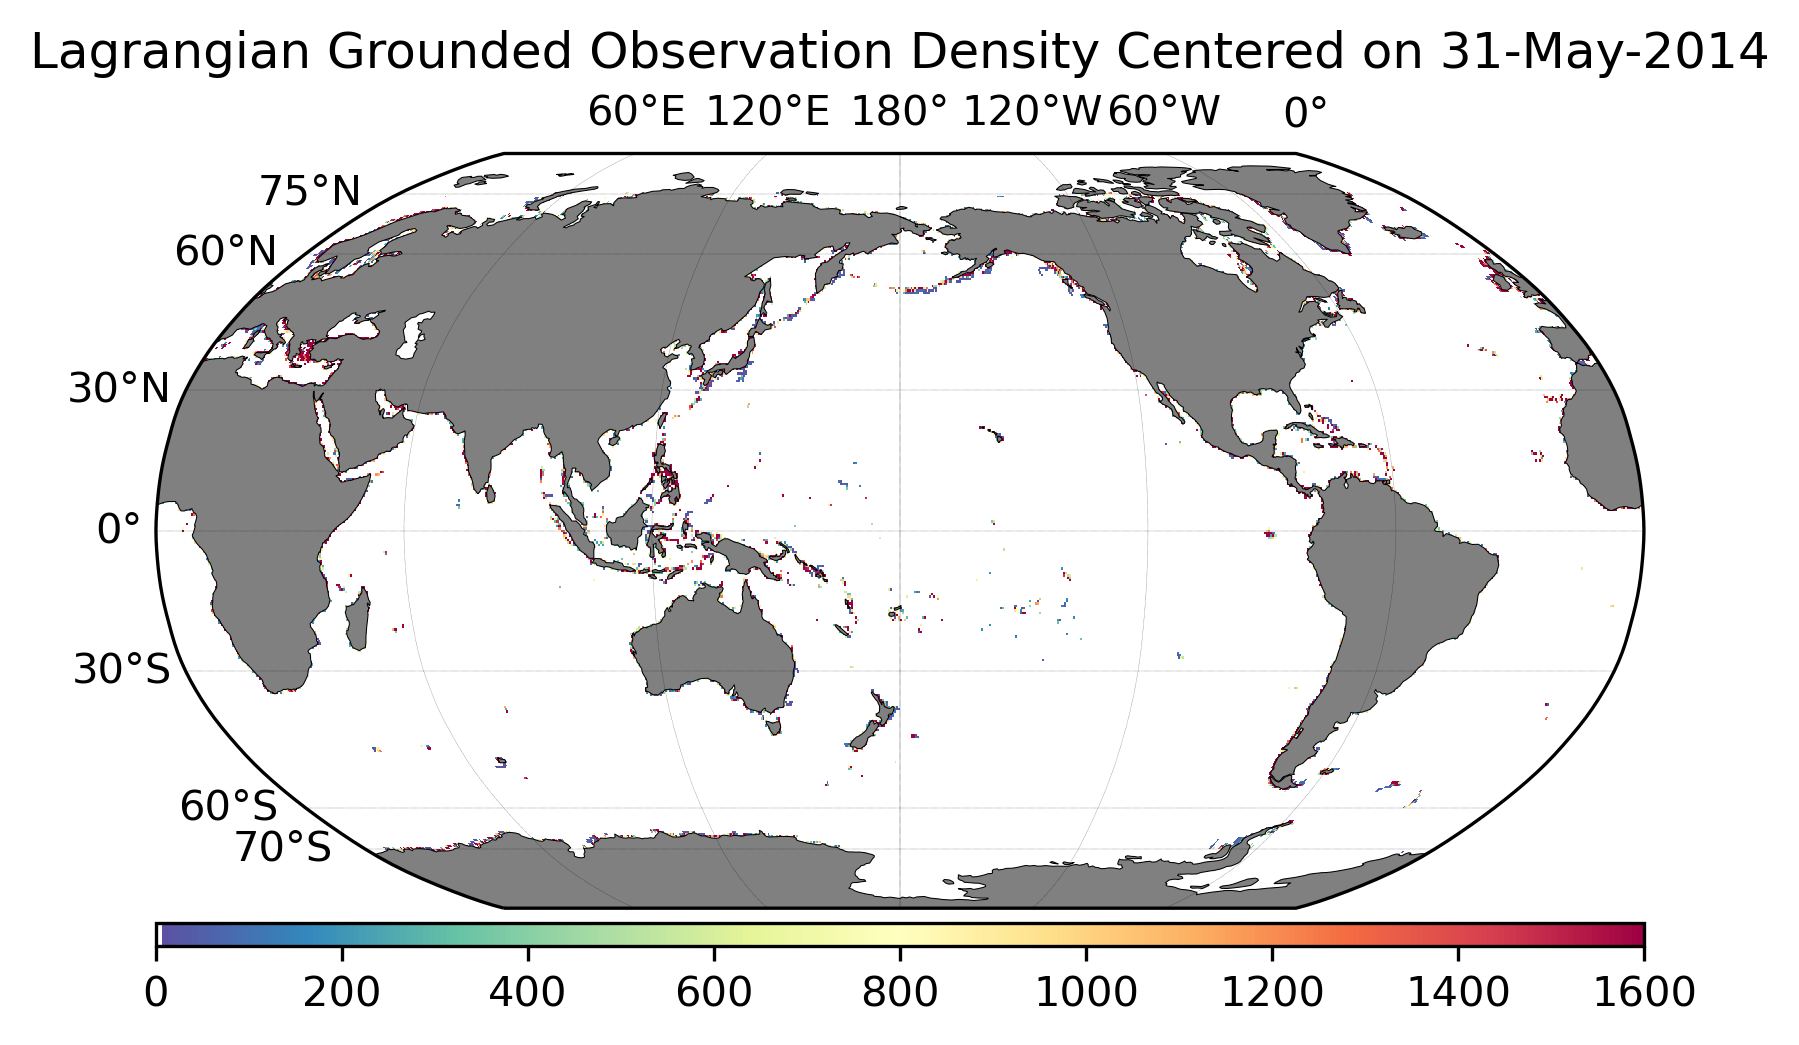

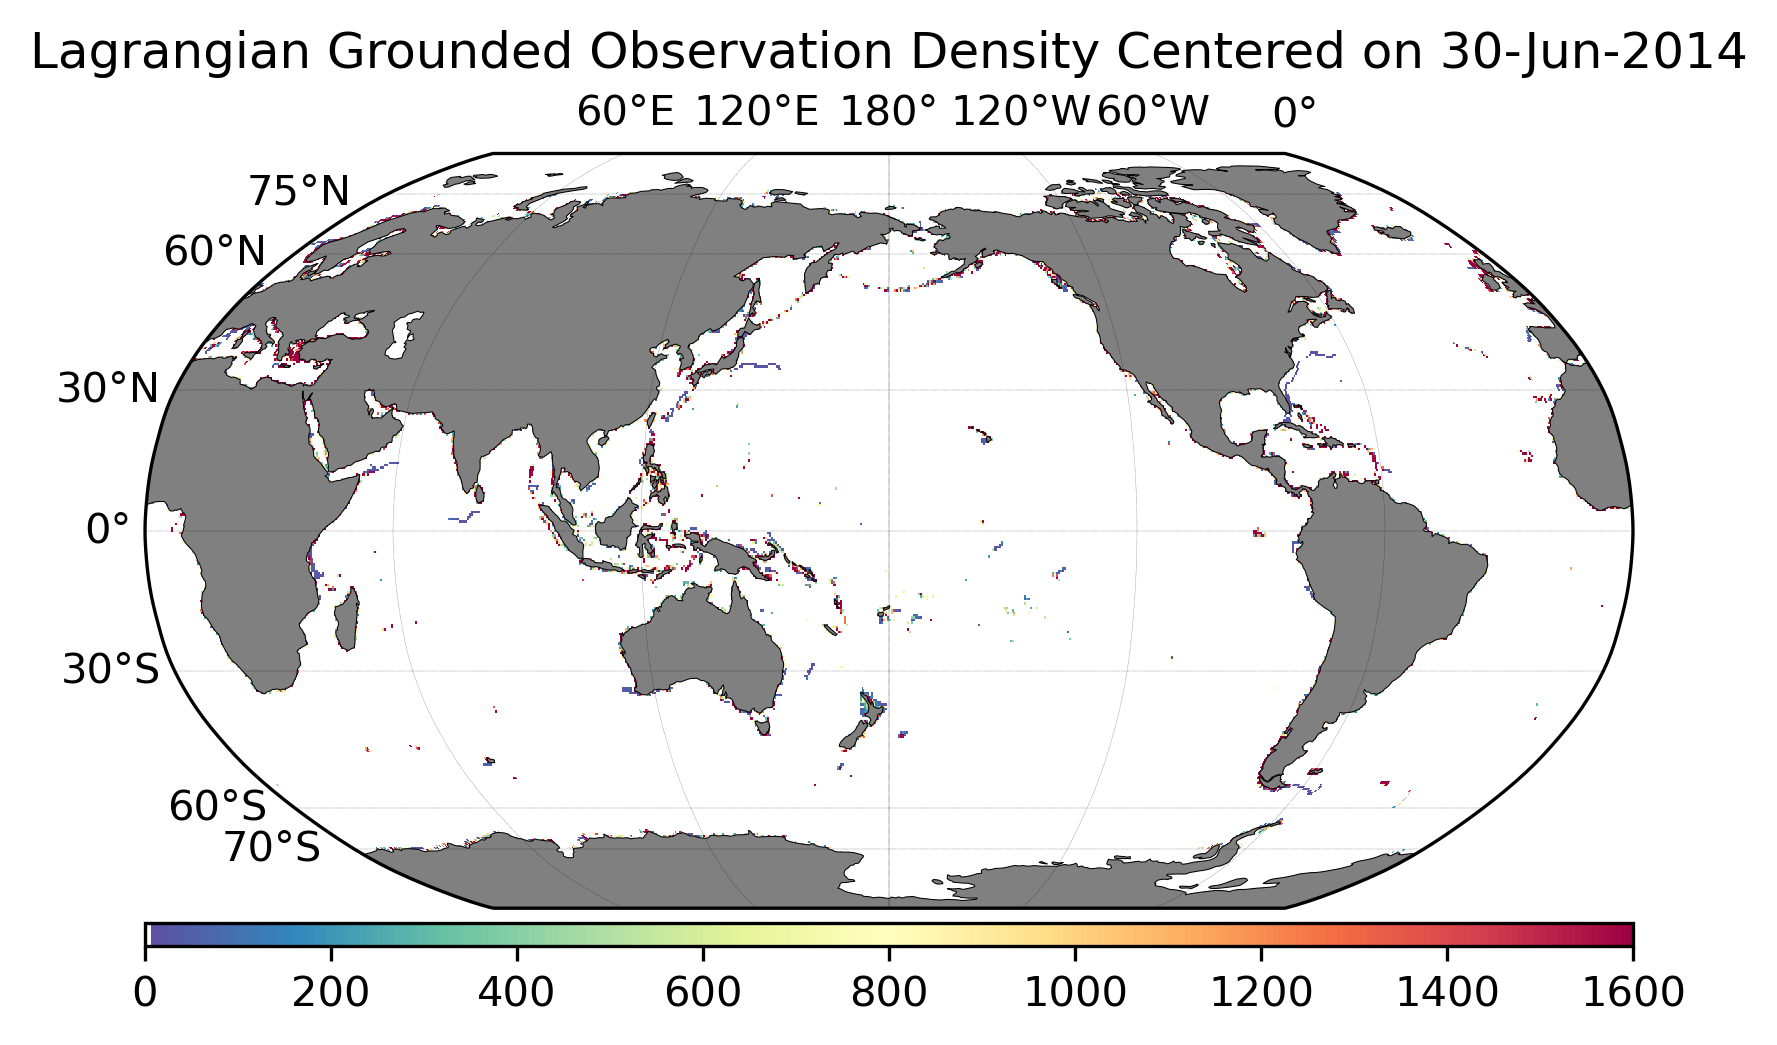

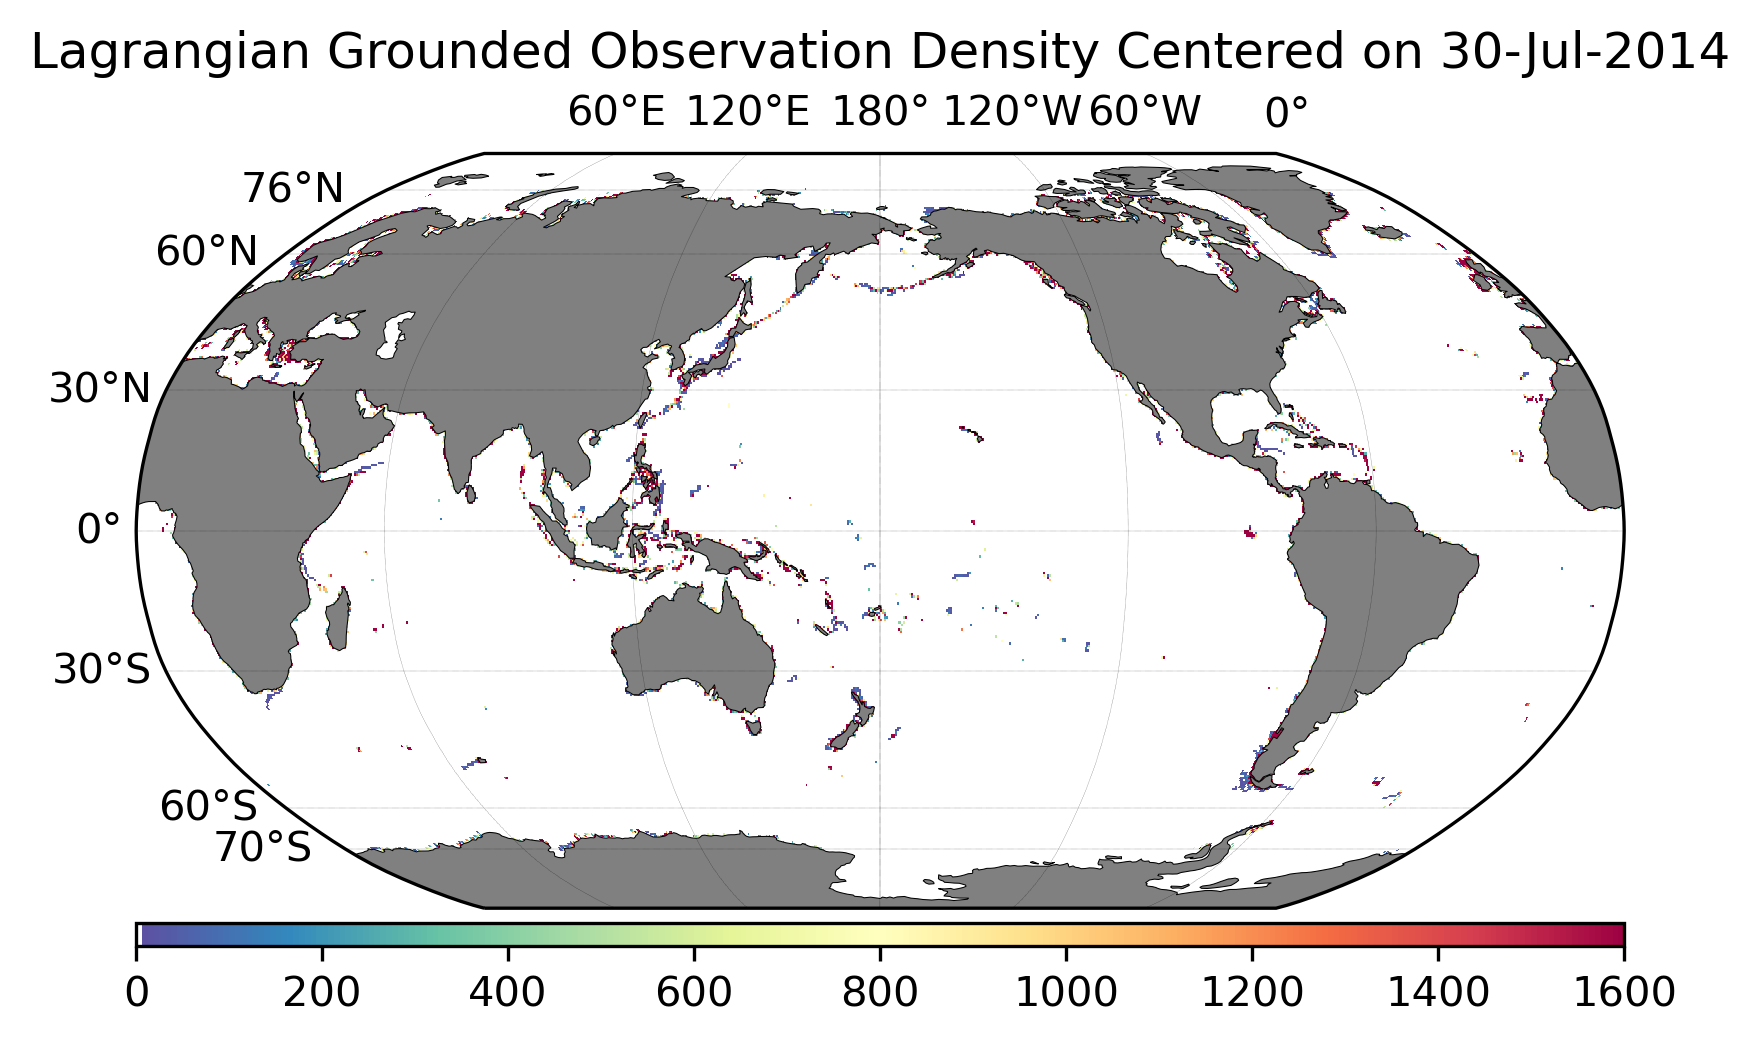

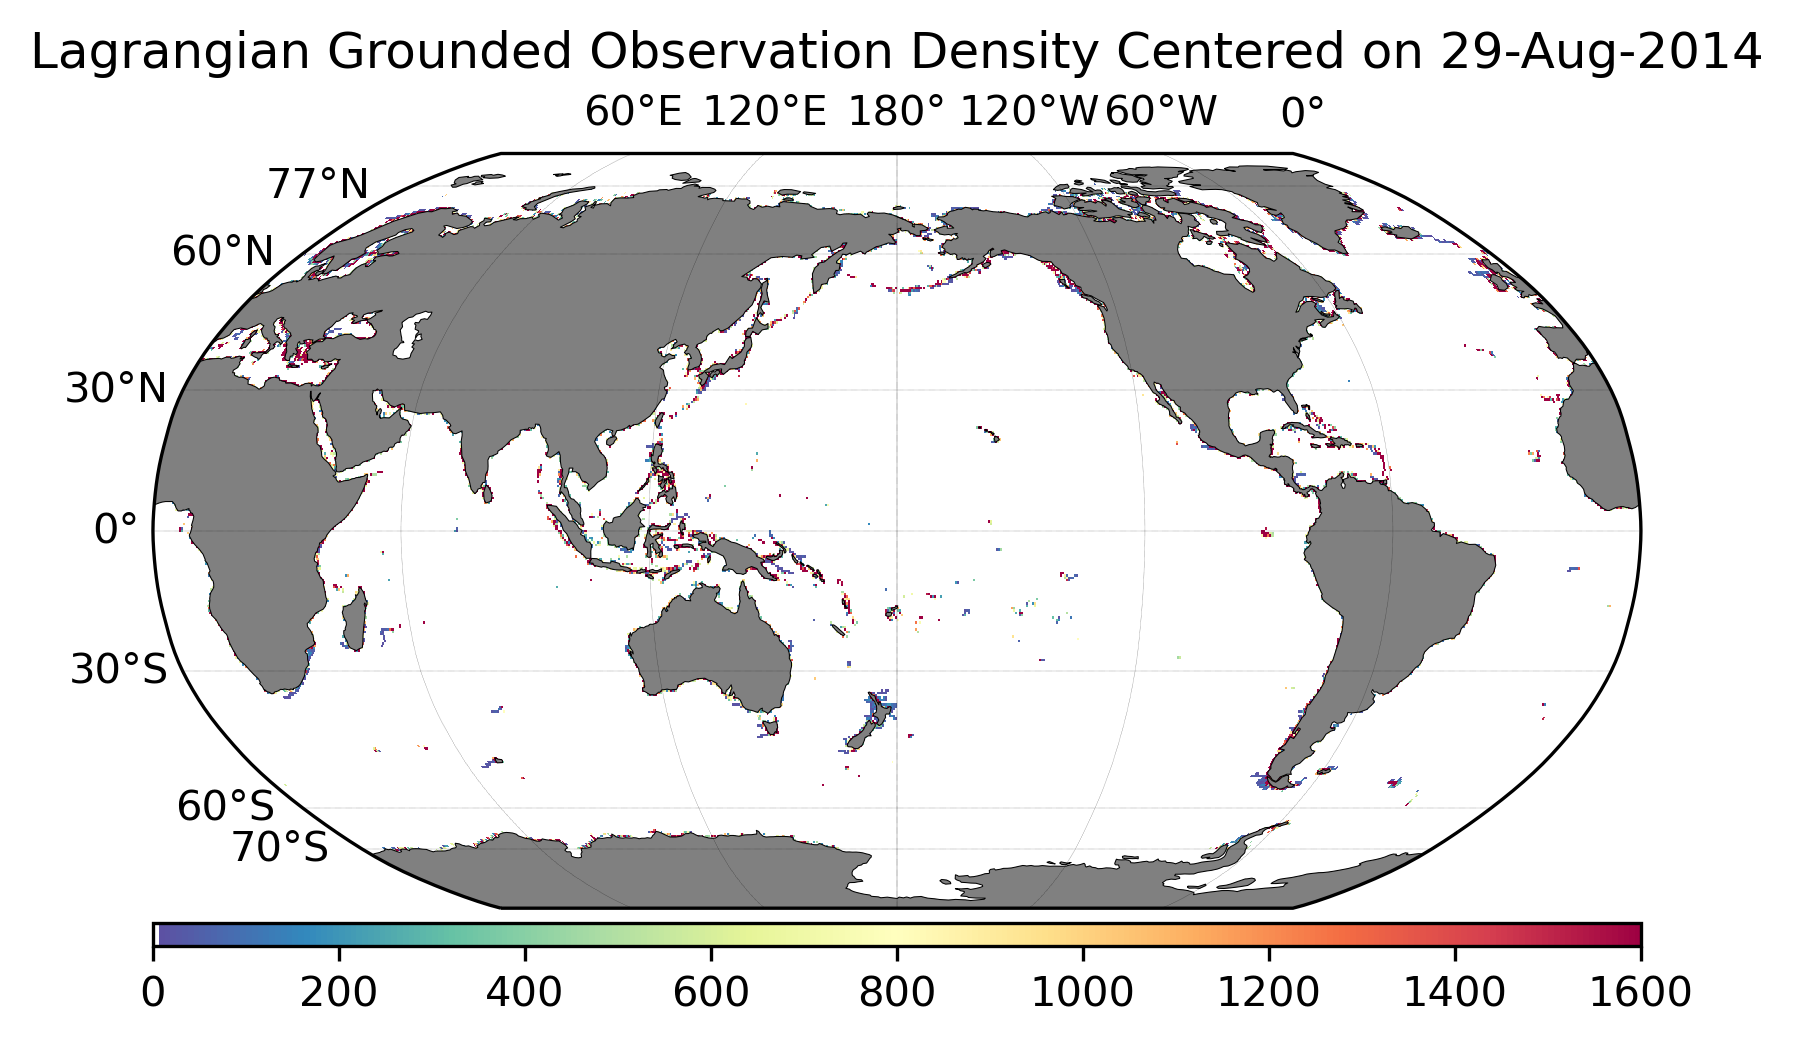

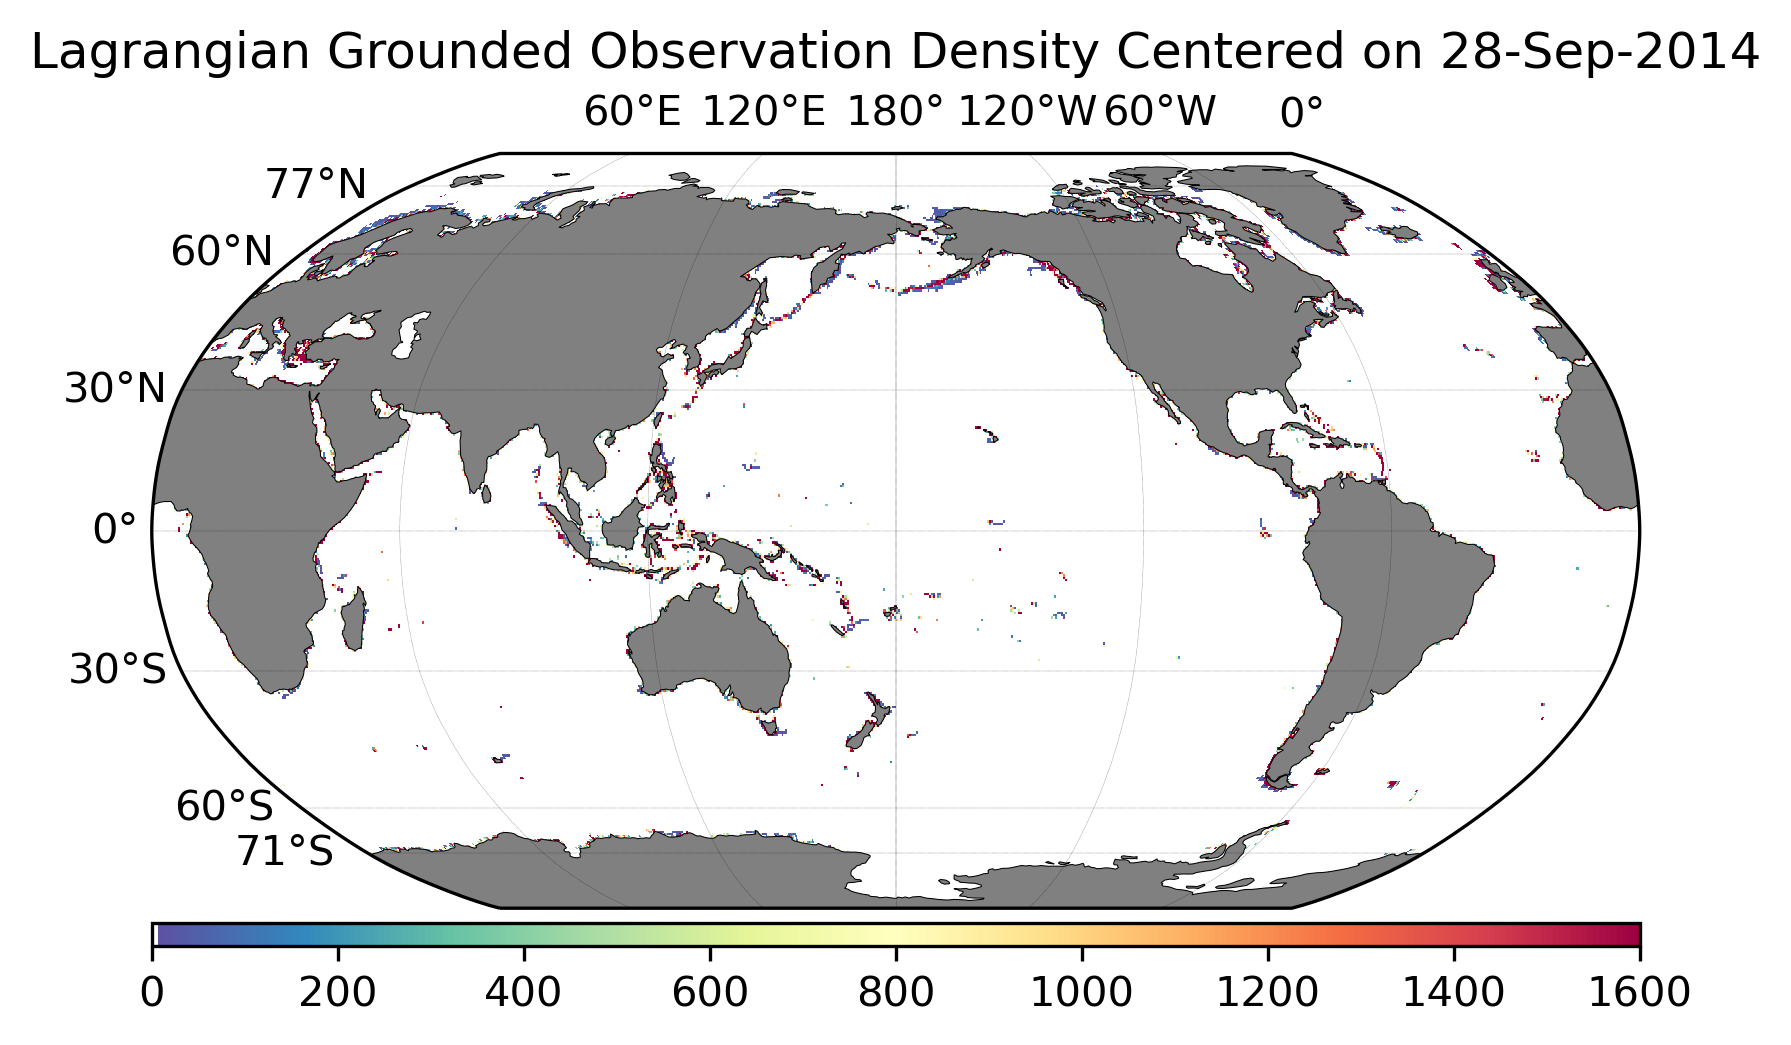

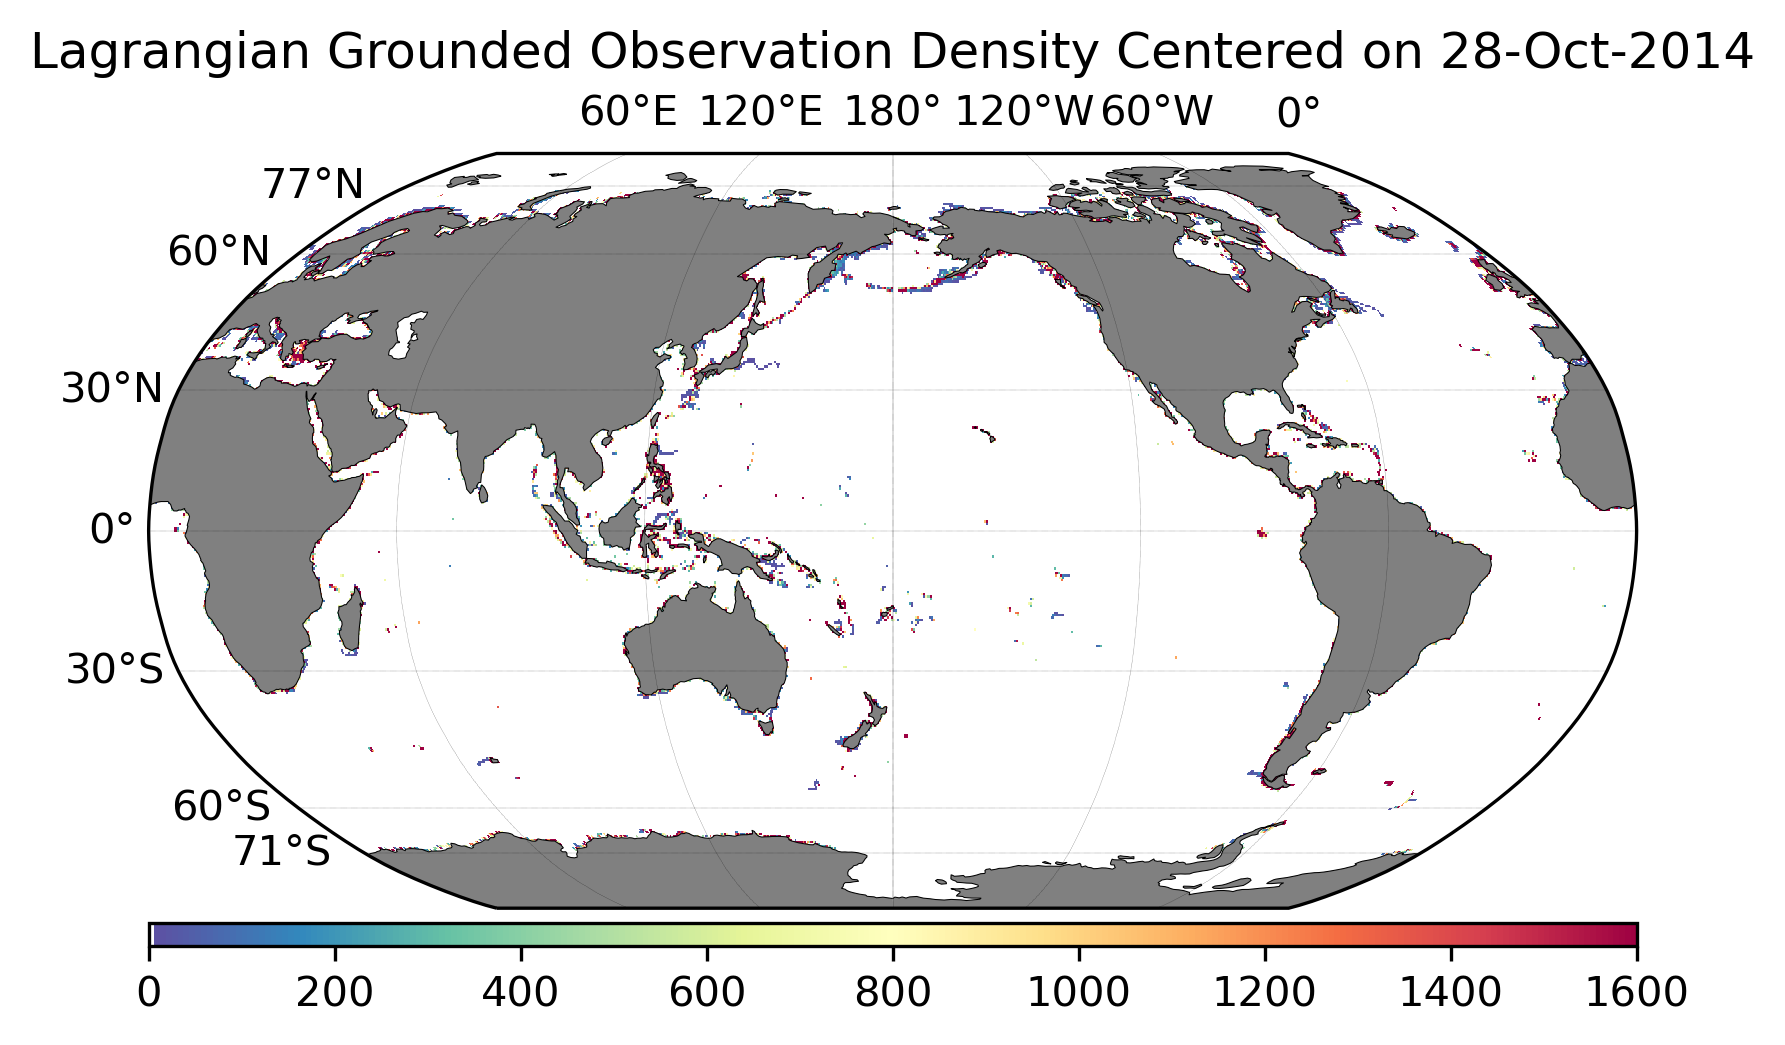

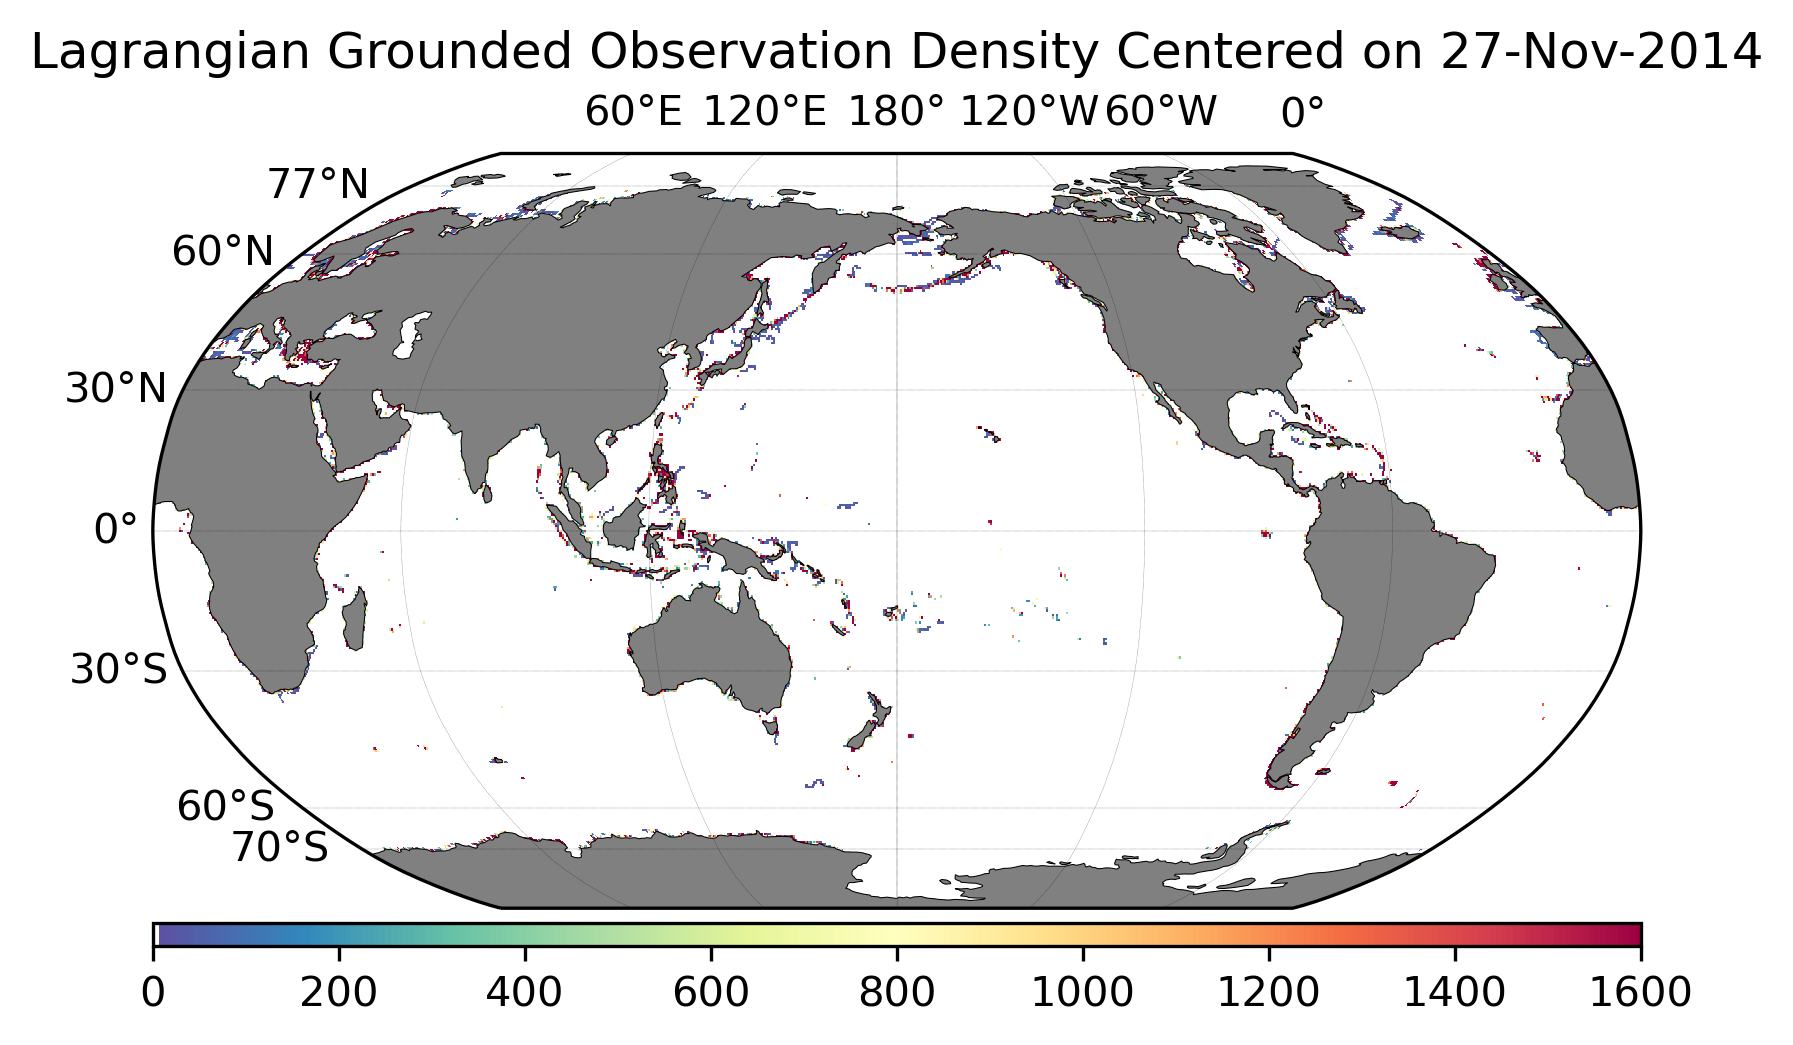

In [56]:
for i in list11:
        # find min and max latitudes where observations are present
        minlat = np.nanmin(ds[int(i)]['lat'].where(ds[int(i)]['den_grounded']!=0))
        maxlat = np.nanmax(ds[int(i)]['lat'].where(ds[int(i)]['den_grounded']!=0))
        # create figure and image
        fig1 = plt.figure(dpi=300)
        ax1 = fig1.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
        image = plt.pcolormesh(lon, lat, 
                        ds[int(i)]['den_grounded'].transpose(),
                        cmap=cmap, 
                        transform=ccrs.PlateCarree(),
                        vmin=0, vmax=1600) 

        # gridlines and labels
        ylocs = np.concatenate([[int(minlat)], np.arange(-60, 61, 30), [int(maxlat)]])
        gl = ax1.gridlines(color='k', linewidth=0.1, linestyle = 'dotted',
                xlocs=np.arange(-180, 181, 60), ylocs=ylocs,
                draw_labels=True)
        gl.bottom_labels = False
        gl.right_labels = False

        # add coastlines and land features
        ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
        ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
        divider = make_axes_locatable(ax1)
        # colorbar settings
        cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
        cb = fig1.colorbar(image, cax=cax, orientation = "horizontal", ticks = np.linspace(0, 1600, 9))
        # add title
        ax1.set_title('Lagrangian Grounded Observation Density Centered on '+dlist[int(i-1)])
        plt.savefig('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'_grounded.pdf', format = 'pdf')

In [47]:
# calculate average density
for i in list11:
    if i == 1:
        den = ds[int(i)]['den']
        den_g = ds[int(i)]['den_grounded']
# add steps together
    else:
        den = den + ds[int(i)]['den']
        den_g = den_g + ds[int(i)]['den_grounded']
den = den/11
den_g = den_g/11


In [48]:
den

<xarray.DataArray 'den' (lon: 719, lat: 359)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 87.99 88.5 89.0 89.5

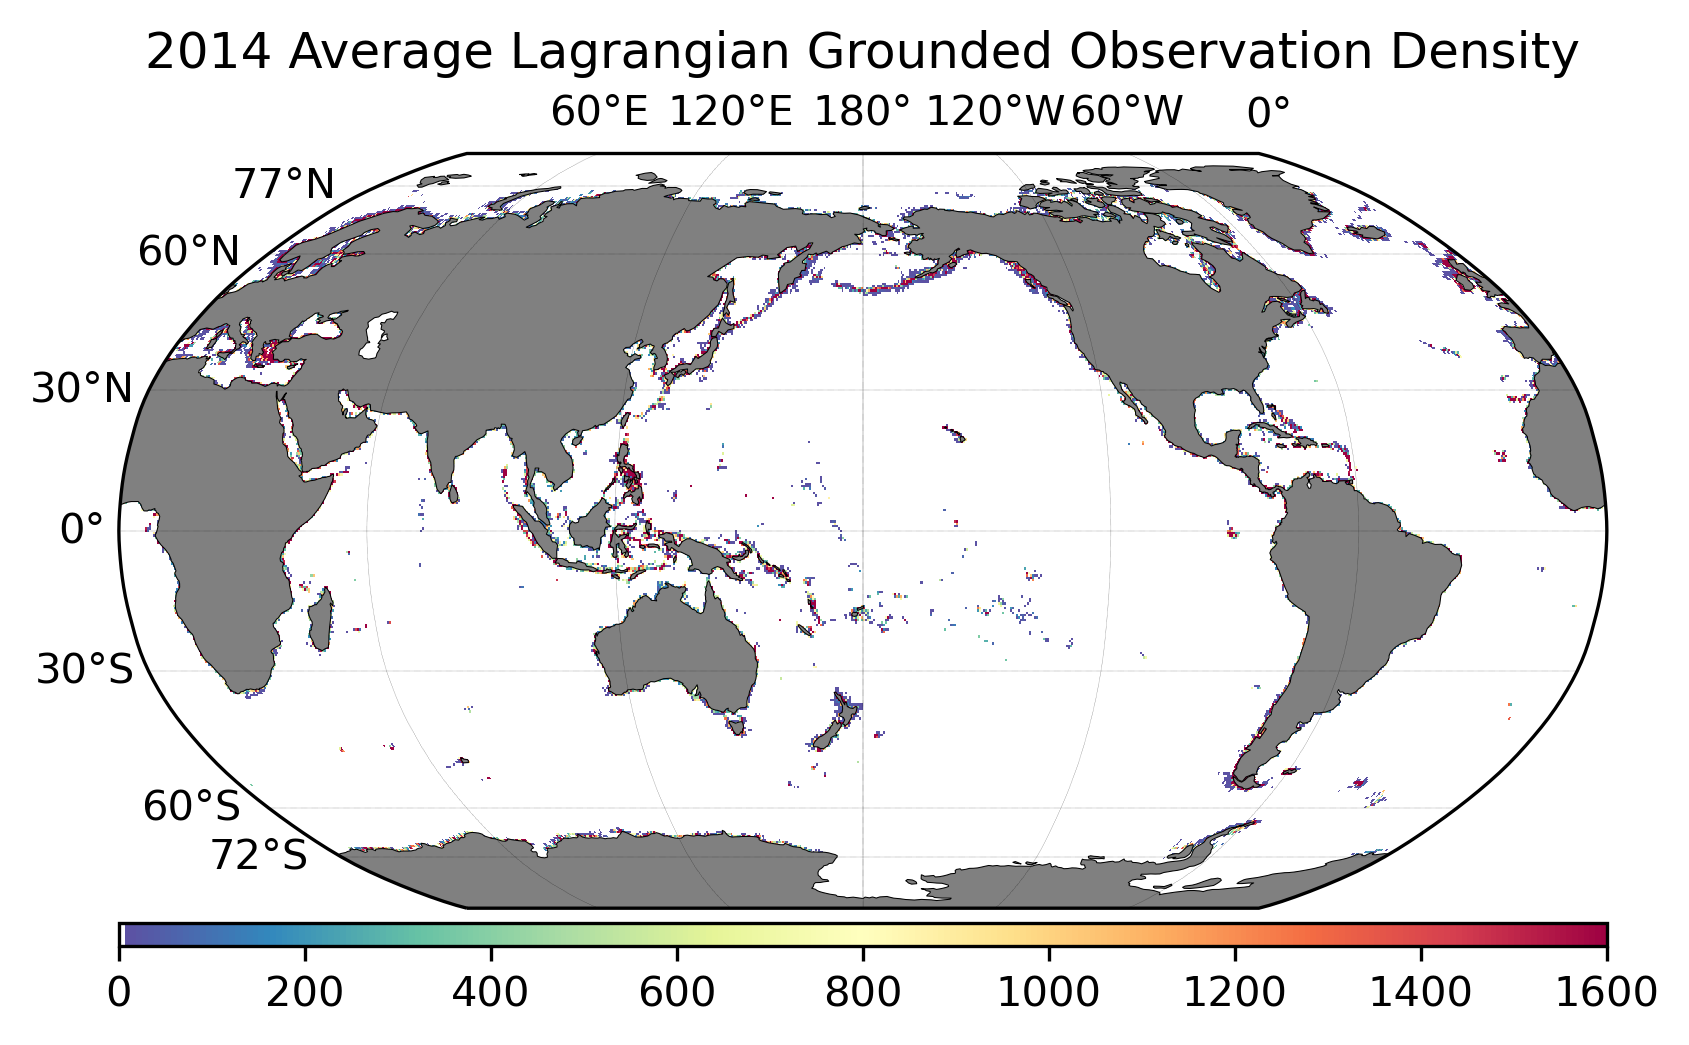

In [53]:
# find min and max latitudes where observations are present
minlat, maxlat = np.nanmin(den_g['lat'].where(den_g!=0)), np.nanmax(den_g['lat'].where(den_g!=0))
# create figure and image
fig1 = plt.figure(dpi=300)
ax1 = fig1.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
image = plt.pcolormesh(lon, lat, 
                den_g.transpose(),
                cmap=cmap, 
                transform=ccrs.PlateCarree(),
                vmin=0, vmax=1600) 

# gridlines and labels
ylocs = np.concatenate([[int(minlat)], np.arange(-60, 61, 30), [int(maxlat)]])
gl = ax1.gridlines(color='k', linewidth=0.1, linestyle = 'dotted',
        xlocs=np.arange(-180, 181, 60), ylocs=ylocs,
        draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# add coastlines and land features
ax1.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax1)
# colorbar settings
cax = divider.append_axes("bottom", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig1.colorbar(image, cax=cax, orientation = "horizontal", ticks = np.linspace(0, 1600, 9))
# add title
ax1.set_title('2014 Average Lagrangian Grounded Observation Density')
plt.savefig('/Users/elifaigle/Desktop/aws_density/hycom_aws_density_'+str(int(i))+'_avg_grounded.pdf', format = 'pdf')